In [1]:
import pandas as pd
import numpy as np
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from xgboost import plot_importance
from matplotlib import pyplot as plt

In [2]:
train_df = pd.read_csv("/Users/kato/jupyter/kaggle/titanic/titanic/train.csv")
test_df = pd.read_csv("/Users/kato/jupyter/kaggle/titanic/titanic/test.csv")

In [3]:
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
X = train_df.drop(["Survived" , "PassengerId" , "Name" , "Ticket" , "Cabin"] , axis=1)
y = train_df["Survived"]

In [5]:
X

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...
886,2,male,27.0,0,0,13.0000,S
887,1,female,19.0,0,0,30.0000,S
888,3,female,NaN,1,2,23.4500,S
889,1,male,26.0,0,0,30.0000,C


In [6]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    891 non-null    int64  
 1   Sex       891 non-null    object 
 2   Age       714 non-null    float64
 3   SibSp     891 non-null    int64  
 4   Parch     891 non-null    int64  
 5   Fare      891 non-null    float64
 6   Embarked  889 non-null    object 
dtypes: float64(2), int64(3), object(2)
memory usage: 48.9+ KB


In [7]:
for i in ["Sex" , "Embarked"]:
    lbl = LabelEncoder()
    X[i] = lbl.fit_transform(list(X[i].values))

In [8]:
X = X.fillna(X.mean())

In [9]:
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.0,1,0,7.2500,2
1,1,0,38.0,1,0,71.2833,0
2,3,0,26.0,0,0,7.9250,2
3,1,0,35.0,1,0,53.1000,2
4,3,1,35.0,0,0,8.0500,2


In [10]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    891 non-null    int64  
 1   Sex       891 non-null    int64  
 2   Age       891 non-null    float64
 3   SibSp     891 non-null    int64  
 4   Parch     891 non-null    int64  
 5   Fare      891 non-null    float64
 6   Embarked  891 non-null    int64  
dtypes: float64(2), int64(5)
memory usage: 48.9 KB


In [11]:
print(X.shape)
print(y.shape)

(891, 7)
(891,)


In [12]:
X_train , X_test , y_train , y_test = train_test_split(X , y , shuffle=True , random_state=0)

print(X_train.shape)
print(X_test.shape)

(668, 7)
(223, 7)


In [13]:
gr_params = {
    "max_depth" : [5,10,15],
    "min_child_weight" : [5,10,15],
    "subsample" : [0.2,0.6,1.0],
    "colsample_bytree" : [0.2,0.6,1.0],
    "eta" : [0.2,0.5,1.0]
}

In [14]:
grid_search = GridSearchCV(XGBClassifier() , param_grid=gr_params, cv=5)

In [15]:
grid_search.fit(X_train , y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, ...),
             param_grid={'colsample_bytree': [0.2, 0.6, 1.0],
                         'eta': [0.2, 0.5, 1.0], 'max_depth': [5, 10, 15],
                         'min_child_weight': [5, 10, 15],
                         'subsample': [0.2, 0.6, 1.0]})

In [16]:
print(grid_search.score(X_train , y_train))
print(grid_search.score(X_test , y_test))

0.8817365269461078
0.8295964125560538


In [17]:
print(grid_search.best_params_)

{'colsample_bytree': 0.6, 'eta': 0.2, 'max_depth': 10, 'min_child_weight': 5, 'subsample': 0.6}


In [18]:
params = {
    "max_depth" : grid_search.best_params_["max_depth"],
    "min_child_weight" : grid_search.best_params_["min_child_weight"],
    "subsample" : grid_search.best_params_["subsample"],
    "colsample_bytree" : grid_search.best_params_["colsample_bytree"],
    "eta" : grid_search.best_params_["eta"],
    "tree_method" : "exact",
    "objective" : "binary:logistic",
    "eval_metric" : "error"
}

In [19]:
dtrain = xgb.DMatrix(X_train , label=y_train)
dtest = xgb.DMatrix(X_test , label=y_test)

model = xgb.train(params=params,
                 dtrain=dtrain,
                 num_boost_round=10000,
                 early_stopping_rounds=500,
                 evals=[(dtest , "test")])

[0]	test-error:0.29596
[1]	test-error:0.28700
[2]	test-error:0.18834
[3]	test-error:0.18386
[4]	test-error:0.17937
[5]	test-error:0.17937
[6]	test-error:0.19731
[7]	test-error:0.19283
[8]	test-error:0.17489
[9]	test-error:0.18386
[10]	test-error:0.16592
[11]	test-error:0.17489
[12]	test-error:0.17489
[13]	test-error:0.16143
[14]	test-error:0.17040
[15]	test-error:0.16143
[16]	test-error:0.15695
[17]	test-error:0.16143
[18]	test-error:0.16592
[19]	test-error:0.17040
[20]	test-error:0.17040
[21]	test-error:0.17040
[22]	test-error:0.16143
[23]	test-error:0.16592
[24]	test-error:0.16592
[25]	test-error:0.17489
[26]	test-error:0.16143
[27]	test-error:0.16592
[28]	test-error:0.17040
[29]	test-error:0.16592
[30]	test-error:0.17040
[31]	test-error:0.16592
[32]	test-error:0.15247
[33]	test-error:0.16592
[34]	test-error:0.15695
[35]	test-error:0.16592
[36]	test-error:0.16592
[37]	test-error:0.16143
[38]	test-error:0.15247
[39]	test-error:0.15695
[40]	test-error:0.15247
[41]	test-error:0.16592
[4

In [20]:
print(model.best_ntree_limit)

144


In [21]:
test = test_df.drop(["PassengerId", "Name" , "Ticket" , "Cabin"] , axis=1)

In [22]:
for j in ["Sex" , "Embarked"]:
    lbl = LabelEncoder()
    test[j] = lbl.fit_transform(list(test[j].values))

In [23]:
test = test.fillna(test.mean())

In [24]:
test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,34.5,0,0,7.8292,1
1,3,0,47.0,1,0,7.0000,2
2,2,1,62.0,0,0,9.6875,1
3,3,1,27.0,0,0,8.6625,2
4,3,0,22.0,1,1,12.2875,2


In [25]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Sex       418 non-null    int64  
 2   Age       418 non-null    float64
 3   SibSp     418 non-null    int64  
 4   Parch     418 non-null    int64  
 5   Fare      418 non-null    float64
 6   Embarked  418 non-null    int64  
dtypes: float64(2), int64(5)
memory usage: 23.0 KB


In [26]:
prediction = model.predict(xgb.DMatrix(test), ntree_limit = model.best_ntree_limit)

/Users/kato/.pyenv/versions/3.11.1/lib/python3.11/site-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(


In [27]:
ID = test_df["PassengerId"]

In [28]:
prediction

array([0.03604502, 0.067893  , 0.02847065, 0.20452656, 0.22549209,
       0.18627217, 0.4765659 , 0.17295724, 0.82998174, 0.00371595,
       0.01068172, 0.06010933, 0.9080867 , 0.01247624, 0.96799946,
       0.90424377, 0.14921027, 0.20788266, 0.54557544, 0.2913401 ,
       0.43926984, 0.6944499 , 0.97035944, 0.29857272, 0.9316995 ,
       0.00337347, 0.9506059 , 0.17796412, 0.6515939 , 0.02808522,
       0.01518045, 0.12177238, 0.22063635, 0.07707828, 0.6713239 ,
       0.25618154, 0.2986106 , 0.20632987, 0.0525469 , 0.23521188,
       0.12581116, 0.36261934, 0.02785203, 0.91942555, 0.98495793,
       0.15386897, 0.22978547, 0.03213611, 0.95879537, 0.5375881 ,
       0.20419829, 0.26897955, 0.8661144 , 0.80950093, 0.16726452,
       0.10456928, 0.02259448, 0.10377277, 0.04449929, 0.9885055 ,
       0.07303804, 0.464786  , 0.11404473, 0.84609187, 0.6030129 ,
       0.9116314 , 0.81168634, 0.06756336, 0.23074365, 0.88981414,
       0.8275989 , 0.03157258, 0.7784799 , 0.12233052, 0.99013

In [29]:
prediction = np.where(prediction < 0.5 , 0 , 1)
prediction

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

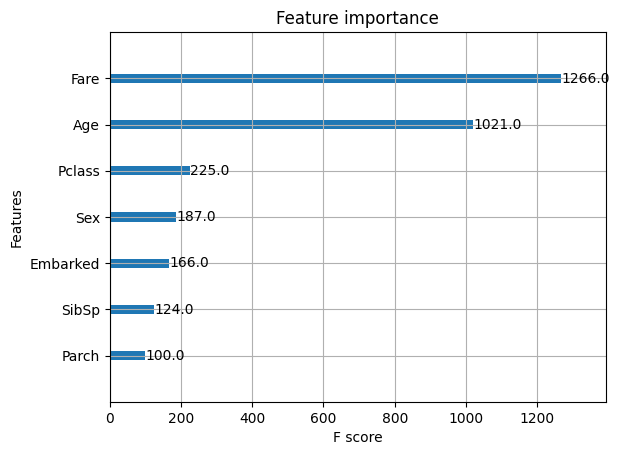

In [30]:
plot_importance(model)
plt.show()

In [31]:
submission = pd.DataFrame({
    "PassengerId":ID,
    "Survived":prediction
})

In [32]:
submission.to_csv("/Users/kato/jupyter/kaggle/titanic/titanic/0719_1.csv" , index=False)